# Guia 1

## Ejercicio 8

**Importamos librería para cálculo simbólico**

In [1]:
import sympy as sy
sy.init_printing()

In [2]:
from IPython.display import Math, display
#import matplotlib.pyplot as plt
#from sympy.plotting import plot
from matplotlib import style
#style.use('fivethirtyeight')
style.use('ggplot')
%matplotlib inline

---

In [3]:
t = sy.symbols('t', real=True, positive=True)
r, l = sy.symbols('R L')
c1, c2, c3 = sy.symbols('Cte_1 Cte_2 Cte_3')

**Valores de componentes**

In [4]:
datos = {
    r: 4,
    l: 10E-3
}

**Tensión aplicada**

In [5]:
v_t1_ej8 = 20
v_t2_ej8 = -20
v_t3_ej8 = 20

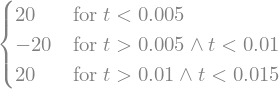

In [6]:
v_ej8 = sy.Piecewise(
    (v_t1_ej8, (0 < t) & (t < 5E-3)), 
    (v_t2_ej8, (5E-3 < t) & (t < 10E-3)),
    (v_t3_ej8, (10E-3 < t) & (t < 15E-3))
)
v_ej8

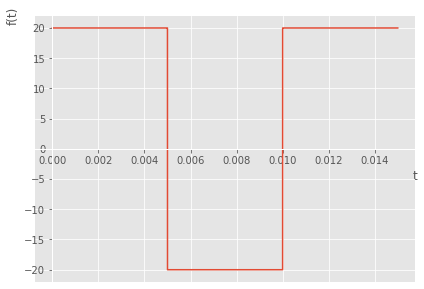

In [7]:
sy.plot(v_ej8, (t, 0, 15E-3))

### Cálculo de corrientes $i_R(t)$ $i_L(t)$ $i(t)$ por tramos

In [8]:
il_t1_ej8 = 1/l * sy.integrate(v_t1_ej8, t) + c1
ir_t1_ej8 = v_t1_ej8 / r
i_t1_ej8 = ir_t1_ej8 + il_t1_ej8
il_t1_ej8.subs(datos)
#i_t1_ej8

In [9]:
il_t2_ej8 = 1/l * sy.integrate(v_t2_ej8, t) + c2
ir_t2_ej8 = v_t2_ej8 / r
i_t2_ej8 = ir_t2_ej8 + il_t2_ej8
il_t2_ej8.subs(datos)

In [10]:
il_t3_ej8 = 1/l * sy.integrate(v_t3_ej8, t) + c3
ir_t3_ej8 = v_t3_ej8 / r
i_t3_ej8 = ir_t3_ej8 + il_t3_ej8
i_t3_ej8.subs(datos)

### Cálculo de constantes de integración

Para $i_L(0) = 0$ :

In [11]:
sy.Eq(0, il_t1_ej8.subs(datos).subs(t, 't0'))

In [12]:
cte1 = sy.solve(sy.Eq(0, il_t1_ej8.subs(datos).subs(t, 0)), c1)[0]
cte1

en $t=5$ms

In [13]:
i_5ms = il_t1_ej8.subs(datos).subs({t: 5E-3, c1: cte1})
i_5ms

In [14]:
sy.Eq(i_5ms, il_t2_ej8.subs(datos).subs(t, 5E-3))

In [15]:
cte2 = sy.solve(sy.Eq(i_5ms, il_t2_ej8.subs(datos).subs(t, 5E-3)), c2)[0]
cte2

en $t=10$ms

In [16]:
i_10ms = il_t2_ej8.subs(datos).subs({t: 10E-3, c2: cte2})
i_10ms

In [17]:
sy.Eq(i_10ms, il_t3_ej8.subs(datos).subs(t, 10E-3))

In [18]:
cte3 = sy.solve(sy.Eq(i_10ms, il_t3_ej8.subs(datos).subs(t, 10E-3)), c3)[0]
cte3

In [19]:
ctes = {
    c1: cte1,
    c2: cte2,
    c3: cte3
}

---------

### Corrientes $i_R(t)$ $i_L(t)$ $i(t)$ por tramos

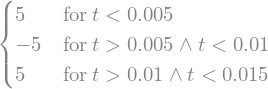

In [20]:
ir_ej8 = sy.Piecewise(
    (ir_t1_ej8.subs(datos).subs(ctes), (0 < t) & (t < 5E-3)), 
    (ir_t2_ej8.subs(datos).subs(ctes), (5E-3 < t) & (t < 10E-3)),
    (ir_t3_ej8.subs(datos).subs(ctes), (10E-3 < t) & (t < 15E-3))
)
ir_ej8

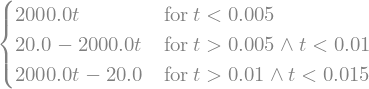

In [21]:
il_ej8 = sy.Piecewise(
    (il_t1_ej8.subs(datos).subs(ctes), (0 < t) & (t < 5E-3)), 
    (il_t2_ej8.subs(datos).subs(ctes), (5E-3 < t) & (t < 10E-3)),
    (il_t3_ej8.subs(datos).subs(ctes), (10E-3 < t) & (t < 15E-3))
#     (2000 *t, (0 < t) & (t < 5E-3)), 
#     (-2000 *t + 10, (5E-3 < t) & (t < 10E-3)),
#     (2000 *t - 20, (10E-3 < t) & (t < 15E-3))    
)
il_ej8

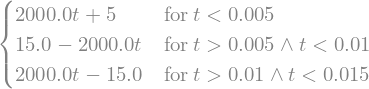

In [22]:
i_ej8 = sy.Piecewise(
    (i_t1_ej8.subs(datos).subs(ctes), (0 < t) & (t < 5E-3)), 
    (i_t2_ej8.subs(datos).subs(ctes), (5E-3 < t) & (t < 10E-3)),
    (i_t3_ej8.subs(datos).subs(ctes), (10E-3 < t) & (t < 15E-3))
)
i_ej8

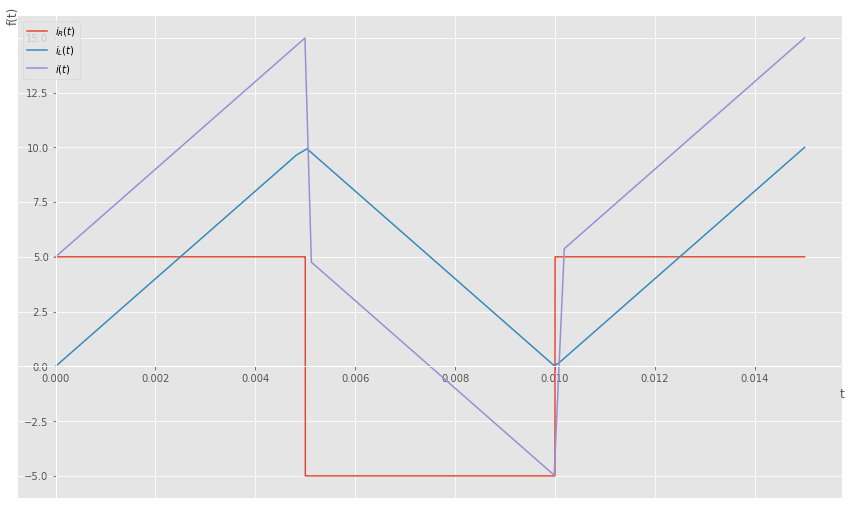

In [23]:
p1 = sy.plot(ir_ej8, (t, 0, 15E-3), legend=True, label='$i_R(t)$', show=False, size=(12, 7))
p2 = sy.plot(il_ej8, (t, 0, 15E-3), label='$i_L(t)$', show=False)
p3 = sy.plot(i_ej8, (t, 0, 15E-3), label='$i(t)$', show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.show()

**Tramo 1**

$i_L(5ms^-)=2000 \cdot (5\cdot 10^{-3})$

$i_L(5ms^-)=10$

**Tramo 2**

$i_L(5ms^+)= -2000 \cdot (5\cdot 10^{-3}) + Cte_2$

$i_L(5ms^+)=i_L(5ms^-)$

$\Rightarrow 10 = -2000 \cdot (5\cdot 10^{-3}) + Cte_2$

$Cte_2 = 20$

$i_L(t)= -2000 \cdot (t) + 20 \qquad $
(para el tramo 2)
